In [1]:
## Load packages
library(readxl)
library(stringr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(cowplot)
library(gggenes)
library(ggtree)
library(Biostrings)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


ggtree v3.14.0 Learn more at https://yulab-smu.top/contribution-tree-data/

Please cite:

S Xu, Z Dai, P Guo, X Fu, S Liu, L Zhou, W Tang, T Feng, M Chen, L
Zhan, T Wu, E Hu, Y Jiang, X Bo, G Yu. ggtreeExtra: Compact
visualization of richly annotated phylogenetic data. Molecular Biology
and Evolution. 2021, 38(9):4039-4042. doi: 10.1093/molbev/msab166


Attaching package: ‘ggtree’


The following object is masked from ‘package:tidyr’:

    expand


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, appe

In [199]:
# Adjust PATHs

## Location in directory
wd <- getwd()
subdir <- "/bin" # should be 'scripts' if location is ./bin/thisfile
if (endsWith(wd, subdir)) {
    wd <- str_remove(wd, subdir)
    setwd(wd)
}
cat('Directory: ', getwd())

## Conda environment
conda_env <- paste0('/home/',Sys.getenv('USER'),'/miniconda3/envs/arabinosylation-anti-crispr/bin')
PATH <- Sys.getenv('PATH')
if (!str_detect(PATH, conda_env)) {
    Sys.setenv('PATH' = paste(conda_env, PATH, sep = ':'))
}
Sys.getenv('PATH')

Directory:  /projects/health_sciences/bms/microbiology/fineranlab/arabinosylation-anti-CRISPR

[1] "/home/dieol22p/miniconda3/envs/arabinosylation-anti-crispr/bin:/opt/conda/bin:/opt/conda/condabin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin"

In [195]:
# Load internal functions
source('bin/hmm_utils.R')
source('bin/utils.R')

In [196]:
# Define variables

## File path
file_path <- '../data_copied-from-HCS/Plasmidsaurus/2025-02-04_GDF7CD_gDNA/GDF7CD_1_p258-50/annotation'
list.files(file_path)

## Assign components
file <- list(
    'sequence' = 'GDF7CD_1_p258-50.fna',
    'features' = 'GDF7CD_1_p258-50.gff3'
)
file[] <- paste(file_path, file, sep='/')

## View
file

[1] "GDF7CD_1_p258-50.embl"              "GDF7CD_1_p258-50.faa"              
 [3] "GDF7CD_1_p258-50.ffn"               "GDF7CD_1_p258-50.fna"              
 [5] "GDF7CD_1_p258-50.gbff"              "GDF7CD_1_p258-50.gff3"             
 [7] "GDF7CD_1_p258-50.hypotheticals.faa" "GDF7CD_1_p258-50.hypotheticals.tsv"
 [9] "GDF7CD_1_p258-50.json"              "GDF7CD_1_p258-50.log"              
[11] "GDF7CD_1_p258-50.tsv"               "GDF7CD_1_p258-50.txt"

$sequence
[1] "../data_copied-from-HCS/Plasmidsaurus/2025-02-04_GDF7CD_gDNA/GDF7CD_1_p258-50/annotation/GDF7CD_1_p258-50.fna"

$features
[1] "../data_copied-from-HCS/Plasmidsaurus/2025-02-04_GDF7CD_gDNA/GDF7CD_1_p258-50/annotation/GDF7CD_1_p258-50.gff3"

In [197]:
# Read data
features <- read_gff3(file$features)
contigs <- readDNAStringSet(file$sequence)

Reading gff-version 3.

Warning message in read_gff3(file$features):
“FASTA sequences present. Will be removed.”



 ##gff-version 3
##feature-ontology https://github.com/The-Sequence-Ontology/SO-Ontologies/blob/v3.1/so.obo
# Annotated with Bakta
# Software: v1.6.1
# Database: v4.0
# DOI: 10.1099/mgen.0.000685
# URL: github.com/oschwengers/bakta 

'data.frame':	5041 obs. of  21 variables:
 $ seqid                  : chr  "contig_1" "contig_1" "contig_1" "contig_1" ...
 $ source                 : chr  "Bakta" "Prodigal" "Prodigal" "Prodigal" ...
 $ type                   : chr  "region" "CDS" "CDS" "CDS" ...
 $ start                  : int  1 28 574 1171 3720 4328 6024 8081 8646 11327 ...
 $ end                    : int  4626713 423 951 1737 3926 6001 8072 8653 11330 12004 ...
 $ score                  : chr  "." "." "." "." ...
 $ strand                 : chr  "+" "+" "+" "+" ...
 $ phase                  : chr  "." "0" "0" "0" ...
 $ attributes             : chr  "ID=contig_1;Name=contig_1" "ID=GLDIGC_00005;Name=hypothetical protein;locus_tag=GLDIGC_00005;product=hypothetical protein;Dbxref=SO:000

Warning message:
“NAs introduced by coercion”


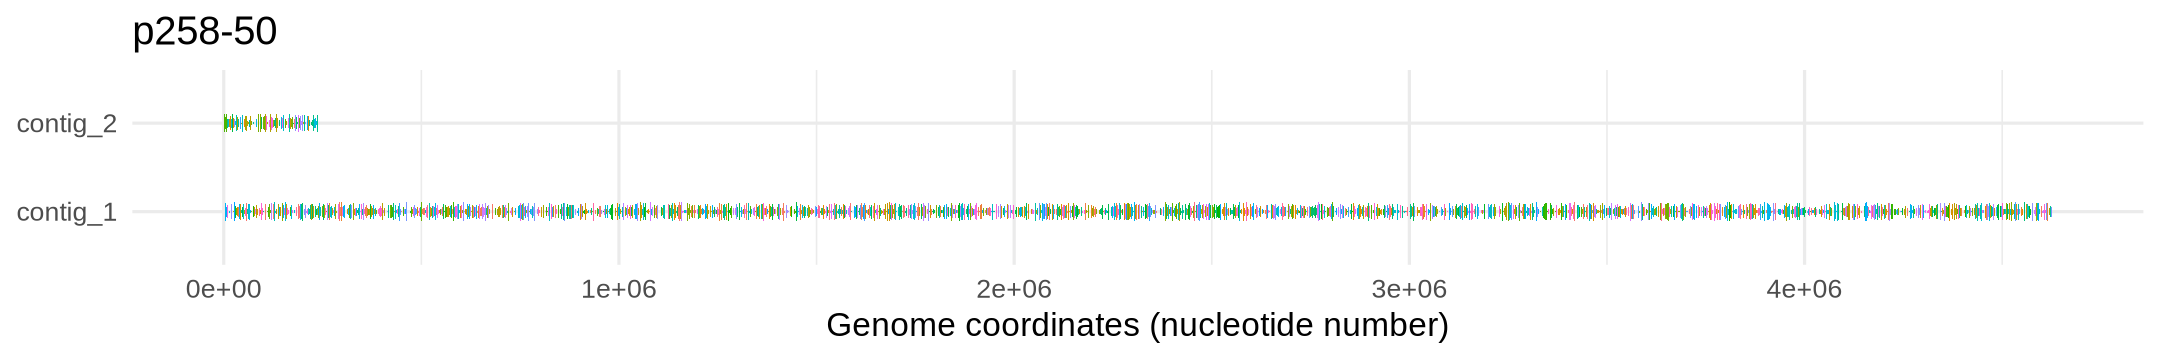

In [190]:
# Visualize features
options(repr.plot.width=18, repr.plot.height=3)

## Select data
df <- features

## Modify components
df$score <- as.numeric(df$score)

## Remove region
index <- which(df$type == 'region')
df <- df[-index, ]

## Plot
ggplot(df) +
    geom_gene_arrow(aes(xmin = start, xmax = end, y = seqid, fill = attribute_product), col=NA) +
    theme_minimal(20) +
    guides(fill = guide_none(), 
           col = guide_legend(position = 'bottom', nrow=1)
          ) +
    labs(title='p258-50', x = "Genome coordinates (nucleotide number)", y = NULL, fill='gene')

Warning message:
“NAs introduced by coercion”


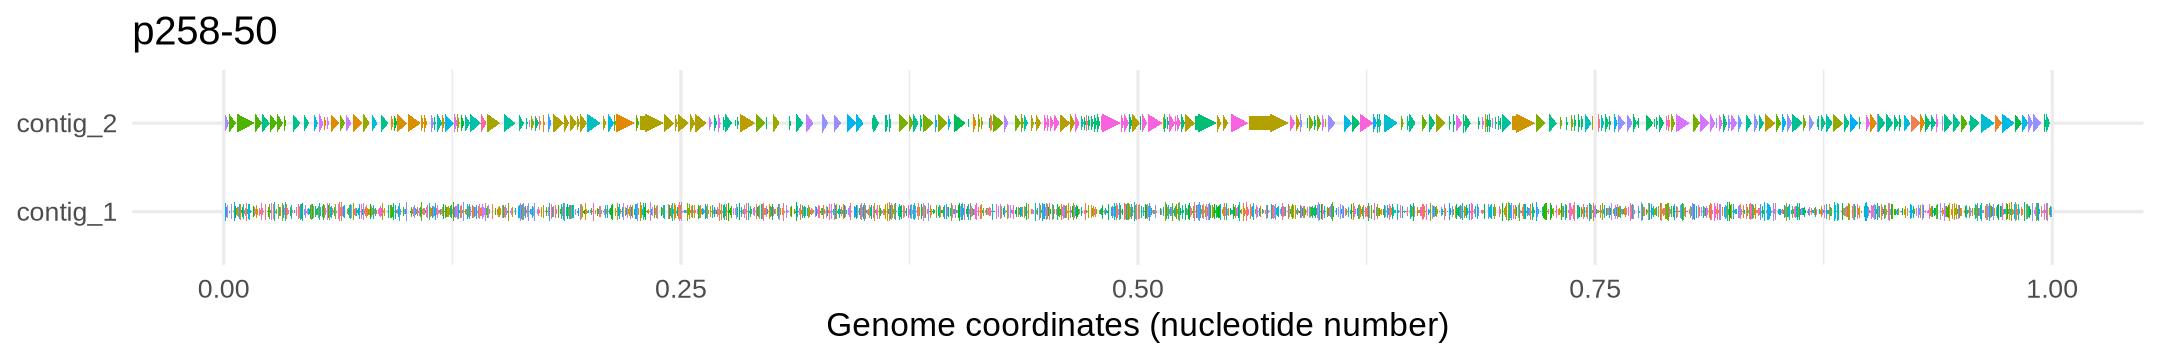

In [194]:
# Visualize features
options(repr.plot.width=18, repr.plot.height=3)

## Select data
df <- features

## Modify components
df$score <- as.numeric(df$score)

## Normalize start/end
df <- df %>% group_by(seqid) %>% mutate(seqlength = max(end), start=start/seqlength, end=end/seqlength)

## Remove region
index <- which(df$type == 'region')
df <- df[-index, ]

## Plot
ggplot(df) +
    geom_gene_arrow(aes(xmin = start, xmax = end, y = seqid, fill = attribute_product), col=NA) +
    theme_minimal(20) +
    guides(fill = guide_none(), 
           col = guide_legend(position = 'bottom', nrow=1)
          ) +
    labs(title='p258-50', x = "Genome coordinates (nucleotide number)", y = NULL, fill='gene')

In [296]:
features[which(features$attribute_gene == 'gmrSD'), ]

,seqid,source,type,start,end,score,strand,phase,attributes,attribute_ID,⋯,attribute_locus_tag,attribute_product,attribute_Dbxref,attribute_gene,attribute_pseudo,attribute_anti_codon,attribute_amino_acid,attribute_transl_except,attribute_Note,attribute_inference
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4851,contig_2,Prodigal,CDS,87870,89150,.,+,0,"ID=GLDIGC_23940;Name=DUF262 domain-containing protein;locus_tag=GLDIGC_23940;product=DUF262 domain-containing protein;Dbxref=COG:COG1479,COG:V,RefSeq:WP_004182042.1,SO:0001217,UniParc:UPI0002830CB8,UniRef:UniRef100_A0A2Z2H2A6,UniRef:UniRef50_I2B6L0,UniRef:UniRef90_I2B6L0;gene=gmrSD",GLDIGC_23940,⋯,GLDIGC_23940,DUF262 domain-containing protein,"COG:COG1479,COG:V,RefSeq:WP_004182042.1,SO:0001217,UniParc:UPI0002830CB8,UniRef:UniRef100_A0A2Z2H2A6,UniRef:UniRef50_I2B6L0,UniRef:UniRef90_I2B6L0",gmrSD,NA,NA,NA,NA,NA,NA


In [293]:
#' Run PADLOC
#'
#' R wrapper for PADLOC: Prokaryotic Antiviral Defence LOCator
#'
#' @param fna Nucleic acid FASTA file
#' @param faa Amino acid FASTA file (only valid with [--gff])
#' @param gff  GFF file (only valid with [--faa])
#' @param crispr CRISPR array input file (.gff from CRISPRDetect)
#'
#' @export
padloc <- function(fna=NULL, faa=NULL, gff=NULL, crispr=NULL, outdir=NULL) {

    # Check input arguments
    ## No FASTA
    if (is.null(fna) & is.null(faa)) {
        msg <- 'No FASTA file supplied. Aborting'
        stop(msg)
    }
    ## FNA & FAA
    if (!is.null(fna) & !is.null(faa)) {
        msg <- 'Nucleic acid AND amino acid FASTA supplied. Please decide for one input.'
        stop(msg)
    }
    ### FNA

    ### FAA & GTF
    if (!is.null(faa) & is.null(gff)) {
        msg <- 'FAA is only valid with GFF. Aborting.'
        stop(msg)
    }
    if (is.null(faa) & !is.null(gff)) {
        msg <- 'GFF is only valid with FAA. Aborting.'
        stop(msg)
    }
    
    # Check PADLOC version
    padloc_version <- try(system('padloc --version', intern=TRUE))
    db_version <- try(system('padloc --db-version', intern=TRUE))
    if (db_version == 'ERROR: Database version information not found') {
        msg <- 'No PADLOC-DB has been found. Trying to install it...'
        warning(msg)

        # Update padloc
        sys_call <- paste0('padloc --db-update')
        system(sys_call, intern=TRUE) %>% paste0(collapse = '\n') %>% cat
    }
    msg <- paste('PADLOC version\n',padloc_version,'\n',db_version)
    message(msg)

    # Check PADLOC dependencies
    sys_call <- paste0('padloc --check-deps')
    msg <- try(system(sys_call, intern=TRUE)) %>% paste0(collapse = '\n')
    message(msg)
    
    ## No arguments
    sys_call <- 'padloc'
    
    ## Only FASTA
    if (1 == 2) {
        sys_call <- paste0('padloc --fna ', fna)
    }

    ## FAA & GFF3

    ## 
    
    # Call PADLOC
    msg <- system2(sys_call, stdout = TRUE, stderr = TRUE)
    msg %>% paste0(collapse = '\n') %>% cat

    # Format result
    result <- NULL
    
    return(result)
}

In [294]:
padloc(fna = contigs$`contig_2 coverage=98.7x`)

PADLOC version
 padloc v1.1.0 
 padloc-db v2.0.0

[15:31:16] >> R installed (4.4.2)
[15:31:16] >> HMMER installed (3.4)
[15:31:16] >> Prodigal installed (2.6.3)
[15:31:17] >> R package 'tidyverse' installed (2.0.0)
[15:31:17] >> R package 'yaml' installed (2.3.10)
[15:31:17] >> R package 'getopt' installed (1.20.4)




        ___       ___                           ___       ___   
       /  /\     /  /\     _____               /  /\     /  /\  
      /  /::\   /  /::\   /  /::\   ___  __   /  /::\   /  /:/_
     /  /:/:/  /  /:/::\ /  /:/\:\ /  /\/ /\ /  /:/\:\ /  /:/ /\
     \  \::/   \  \::/\/ \  \:\/:/ \  \:\/:/ \  \:\/:/ \  \:\/:/
      \  \:\    \  \:\    \  \::/   \  \::/   \  \::/   \  \::/  
       \__\/     \__\/     \__\/     \__\/     \__\/     \__\/          

PADLOC :: Locate antiviral defence systems in prokaryotic genomes

Usage:
    padloc [options] --faa <genome.faa> --gff <features.gff>
    padloc [options] --fna <genome.fna>
General:
    --help            Print this help message
    --version         Print version information
    --citation        Print citation information
    --check-deps      Check that dependencies are installed
    --debug           Run with debug messages
Database:
    --db-list         List all PADLOC-DB releases
    --db-install [n]  Install specific PAD

NULL

In [292]:
writeXStringSet(contigs$`contig_2 coverage=98.7x`, )

[1] "ATGCCAGAAGCAGAGGATCCATCCCATTTTATACCTACCTTATAACACTTAGAAAAACAACATGTTAAAAATGTTTATTGGAAACAATTTTATTTCCAATTGTAATGATAACCATTCTCATATTAATATGGCTACGTGATAATTAACTTTTGATGCACTCCGCATGTCTGACCGTGCCACTACCACAGCTTCCTTAACGTTCGAGTCGCTTTATGGCACCCATCACGGCTGGTTGAAAAGTTGGCTGACGCGCAAACTCCAGTCTGCCTTTGATGCAGATGACATTGCCCAGGACACTTTTTTGCGGGTAATGAGCAGCGAAACGCTCTCGACGATCCGCGATCCTCGCTCTTTCCTGTGCACTATCGCCAAACGCGTGATGGTGGACCTGTTTCGCCGAAACGCGCTGGAAAAAGCGTATCTGGAGATGCTGGCGCTTATGCCGGAGGGGGGAGCGCCTTCACCTGAGGAACGCGAAAGCCAGCTCGAGACCCTACAACTCGTCGACAGCATGCTGGACGGGCTAAACGGAAAAACACGTGAAGCGTTTCTGCTTTCGCAACTGGATGGCCTGACATACAGCGAGATTGCGCACAAACTCGGTGTTTCCGTCAGCTCCGTGAAAAAATACGTGGCGAAAGCCGTCGAGCACTGCCTGCTGTTTCGTCTGGAGCATGGGTTATGAATCCTTCGTTAACCGATTCCCGCCGTCAGGCGCTGCGTTCAGCTTCCCACTGGTATGCCGTGCTAAGCGGCGAGCGCGTCAGCCCACAACAGGAAGCGCGCTGGCAACAGTGGTATGAACAGGATCAGGATAACCAGTGGGCCTGGCAGCAGGTTGAAAACCTGCGCAACCAGCTTGGCGGTGTGCCTGGCGACGTTGCCAGCCGGGCGCTGCACGATACCCGCCTCACCCGCCGTCACGTGATGAAAGGATTACTGCTGTTGCTCGGCGCTGGCGGAGGCTGGCAACTCTGGCAGTCGGAAACCGGCGAAGGTCTGCGGGCAGATTACCGCACCCCCAAAGGCGCAGTCAGCCGTCAGCAACTGGAAGATGGCTCCCTGCTCACGCTGAATACCCAAAGCGCGGCGGATGTGCGTTTTGATGCGCATCAGCGCACCGTCCGGCTCTGGTACGGTGAAATCGCCATTACTACCGCGAAAGATGCGCAGCAACGCTCCTTCCGCGTCCTGACCCGTCAGGGCCAACTCACCGCTTTAGGGACAGAATTTACCGTCCGCCAGCAGGATAATTTCACGCAGCTTGACGTGCAGCAGCACGCCGTGGAAGTGCTTCTCGCCAGTGCCCCCGCGCAAAAACGCATCGTGAACGCTGGTGAAAGCCTGCAGTTCAGCGCCTCTGAGTTTGGCGCAGTGAAACCGCTGGATGACGAGAGTACAAGCTGGACGAAGGGCATCCTGAGCTTCAGCGATAAACCGCTGGGTGAGGTGATAGCCACGCTAAGCCGTTACCGCAACGGCGTGCTGCGCTGCGATCCCGCCGTTGCCGGGCTGCGCCTGAGCGGGACGTTCCCGCTGAAAAATACCGATGCGATCCTGAACGTTATCGCTCAAACGCTTCCCGTTAAAATTCAGTCTATTACGCGGTACTGGATAAACATTTCACCGCTGTAAGAAAAATAATTCTCATTTCGATTGTCCTTTTTACCTTCTCGTTCGACTCATAGCTGAACACAACAAAAATGATGAATGATGATGGAGAAGGTATGACGCCGTTACGCGTTTTTCGTAAAACAACACCTTTGGTTAACGCCATTCGCCTGAGCCTGCTGCCGCTGGCCGGTCTCTCGTTTTCCGCTTTTGCTGCACAGGTTGATATCGCACCGGGATCGCTCGACAAAGCGCTCAATCAGTATGCCGCACACAGCGGAATTACCCTCTCGGTTGACGCCAGCCTGACGCGCGGCAAGCAGAGCAACGGCCTGCACGGAGATTACGACGTCGAGAGCGGCCTGCAACAGCTGCTGGACGGCAGCGGACTGCAGGTAAAACCGCTGGGAAATAACAGCTGGACGCTGGAGCCCGCGCCCGCGCCAAAAGAAGATGCCCTGACCGTGGTCGGCGACTGGCTGGGCGATGCGCGTGAAAACGACGTATTTGAACATGCTGGCGCGCGTGACGTGATCCGCCGTGAGGATTTCGCCAAAACCGGCGCAACCACCATGCGTGAGGTGCTTAACCGCATCCCTGGCGTCAGCGCGCCGGAAAACAACGGCACCGGCAGCCACGACCTGGCGATGAACTTTGGCATCCGGGGCCTGAACCCACGCCTCGCCAGCCGCTCGACCGTCCTGATGGACGGCATCCCCGTCCCCTTTGCCCCTTACGGTCAGCCGCAGCTTTCACTGGCTCCCGTTTCGCTCGGCAACATGGATGCCATTGACGTGGTGCGCGGTGGTGGTGCGGTGCGTTACGGACCGCAGAGCGTGGGCGGCGTGGTGAACTTTGTTACCCGCGCCATTCCGCAGGACTTTGGTATCGAGGCGGGGGTGGAAGGTCAGCTCAGCCCAACCTCTTCACAAAACAACCCGAAAGAGACGCACAACCTGATGGTGGGCGGCACAGCGGACAACGGTTTTGGCACCGCGCTGCTCTACTCCGGCACGCGCGGCAGTGACTGGCGCGAGCACAGCGCCACCCGCATCGACGACCTGATGCTGAAAAGCAAATATGCGCCGAATGAGGTGCACACCTTCAACAGCCTGCTGCAATATTACGATGGTGAAGCCGACATGCCCGGCGGCCTGTCCCGCGCGGATTACGACGCCGATCGCTGGCAATCCACCCGCCCGTATGACCGCTTCTGGGGCCGTCGCAAGCTGGCGAGCCTGGGCTACCAGTTCCAGCCGGACAGCCAGCATAAATTCAACATTCTGGGGTTCTACACCCAAACCCTGCGCAGCGGCTACCTGGAGCAAGGCAAACGCATCACCCTCTCGCCGCGTAACTACTGGGTGCGCGGTATTGAGCCACGCTACAGCCAGAGCTTTATGATCGGCCCTTACGCGCACGAAGTGGGCGTGGGCTATCGCTATGTGAATGAATCAACGCATGAAATGCGTTACTACACCGCCACCAGCAGCGGGCAGTTGCCGTCCGGCTCAAGCCCTTACGACCGCGACACGCGTTCCGGCACCGAGGCGCACGCCTGGTATCTGGATGACAAAATCGACATCGGCAACTGGACCATCACGCCGGGTATGCGTTTCGAACATATCGAGTCATACCAGAACAACGCCATCAAAGGCACGCACGAAGAGGTGAGCTATAACGCACCGCTTCCGGCGTTGAACGTGCTCTATCACCTGACTGATAGCTGGAATCTTTATGCAAACACTGAAGGCTCGTTCGGCACCGTACAGTACAGCCAGATTGGCAAGGCTGTGCAAAGCGGCAATGTGGAACCGGAAAAAGCGCGAACCTGGGAACTCGGTACCCGCTACGACGACGGCGCGCTGACGGCGGAAATGGGGCTGTTCCTAATTAACTTTAACAATCAGTACGACTCCAACCAGACCAACGACACCGTCACTGCACGTGGCAAAACGCGCCATACCGGGCTGGAAACGCAGGCACGTTACGACCTGGGTACGCTAACGCCAACGCTTGATAACGTTTCCGTCTACGCCAGCTATGCGTATGTGAACGCGGAAATCCGCGAGAAAGGTGACACCTATGGCAATCAGGTGACATTCTCCCCGAAACATAAAGGCACGCTGGGCGTGGACTACAAGCCGGGCAACTGGACGTTCAATCTGAACAGCGATTTCCAGTCCAGCCAGTTTGCGGATAACGCCAATACGGTGAAAGAGAGCGCCGACGGCAGTACCGGCCGCATTCCCGGCTTCATGCTCTGGGGCGCACGCGTGGCGTATGACTTTGGCCCGCAGATGGCAGATCTGAACCTGGCGTTCGGTGTGAAAAACATCTTCGACCAGGACTACTTCATCCGCTCTTATGACGACAACAACAAA

In [250]:
sys_call <- paste0('padloc --db-version')


Unpacking database...
Compiling database...

In [234]:
# Update padloc
sys_call <- 'padloc --db-update'
msg <- system2(sys_call, stdout = TRUE, stderr = TRUE)
msg %>% paste0(collapse = '\n') %>% cat

ERROR: Error in system2(sys_call, stdout = TRUE, stderr = TRUE): error in running command


In [232]:
system2(sys_call, stdout = TRUE, stderr = TRUE)

ERROR: Error in system2(sys_call, stdout = TRUE, stderr = TRUE): error in running command


In [ ]:
# Run DefenseFinder


In [ ]:
# Check if GTPase predicted by PADLOC is part of the CBASS system or DISARM

In [ ]:
# Check for plasmid oriT

In [152]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS/LAPACK: /home/dieol22p/miniconda3/envs/arabinosylation-anti-crispr/lib/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] Biostrings_2.74.0   GenomeInfoDb_1.42.0 XVector_0.46.0     
 [4] IRanges_2.40.0      S4Vectors_0.44.0    BiocGenerics_0.52.0
 [7] ggtree_3.14.0       gggenes_0.5.1       cowplot_1.1.3      
[10] ggplot2_3.5.1       tidyr_1.3.1         dplyr_1.1.4        
